# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [11]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [12]:
# 3 digits merge on country
merge_share_ewcs("3digits_country.csv", convert_to_3_digits=True)
# 4 digits merge on country
merge_share_ewcs("4digits_country.csv", convert_to_3_digits=False)

In [13]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_year_country : 3699 unique ids
4digits_year_country : 2758 unique ids
4digits_country : 2644 unique ids
3digits_year : 3944 unique ids
4digits_year : 3915 unique ids
3digits_country : 3168 unique ids


In [14]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_country.csv"
)

In [15]:
df.first_treated.describe()

count    7002.000000
mean      929.211654
std      1003.646282
min         0.000000
25%         0.000000
50%         0.000000
75%      2013.000000
max      2015.000000
Name: first_treated, dtype: float64

In [17]:
df.first_treated.unique()

array([2013,    0, 2015])

In [16]:
df.groupby(["mergeid", "wave"])["work_horizon_change_minimum"].mean()

mergeid       wave
AT-009376-01  4       1.0
              5       1.0
              6       1.0
AT-018393-02  4       1.0
              5       1.0
                     ... 
SI-994179-01  4       2.0
              5       1.0
              6       0.0
SI-995464-01  4       2.0
              5       2.0
Name: work_horizon_change_minimum, Length: 6145, dtype: float64

In [5]:
len(df)

7002

In [9]:
df.mergeid.value_counts().value_counts()

count
2    2118
4    1050
Name: count, dtype: int64

In [11]:
df.jqi_prospects.describe()

count    8827.000000
mean       60.602371
std        12.908274
min         0.000000
25%        52.777778
50%        61.309524
75%        67.677696
max       100.000000
Name: jqi_prospects, dtype: float64

In [28]:
df.columns

Index(['mergeid', 'hhid', 'wave', 'year', 'age', 'nb_children',
       'nb_grandchildren', 'partnerinhh', 'job_status', 'industry', 'thinc',
       'investment', 'life_insurance', 'sphus', 'sphus2', 'chronic',
       'chronic2', 'eurod', 'eurodcat', 'affective_suffering',
       'motivation_lack', 'country', 'gender', 'yrbirth', 'mobirth',
       'yr1country', 'yrseducation', 'isco2011', 'isco2015', 'yr1contribution',
       'yrscontribution', 'retirement_age', 'retirement_age_early',
       'retirement_age_minimum', 'work_horizon', 'work_horizon_minimum',
       'work_horizon_change', 'work_horizon_change_minimum', 'my_wgt',
       'cciw_w4', 'cciw_w6', 'cciw', 'isco', 'isco1', 'jqi_monthly_earnings',
       'jqi_skills_discretion', 'jqi_physical_environment',
       'jqi_intensity_slim', 'jqi_working_time_quality',
       'jqi_social_environment', 'jqi_prospects', 'jqi_intensity',
       'jqi_monthly_earnings_w', 'jqi_skills_discretion_w',
       'jqi_physical_environment_w', 'jqi_in

In [6]:
df[[col for col in df.columns if col.startswith("jqi")]].describe()

,jqi_monthly_earnings,jqi_skills_discretion,jqi_physical_environment,jqi_intensity_slim,jqi_working_time_quality,jqi_social_environment,jqi_prospects,jqi_intensity,jqi_monthly_earnings_w,jqi_skills_discretion_w,jqi_physical_environment_w,jqi_intensity_slim_w,jqi_working_time_quality_w,jqi_social_environment_w,jqi_prospects_w,jqi_intensity_w,jqi_sum,jqi_sum_w
count,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000,4190.000000
mean,1598.024883,59.148585,85.287575,41.175317,86.984542,80.012205,59.740725,52.869690,1670.783455,62.163133,88.040697,43.458397,89.646915,83.184744,62.487610,54.870908,65.677214,444.364881
std,789.010751,14.829134,9.167025,12.453332,11.215655,6.744187,12.938987,8.596378,1077.003338,27.050836,27.900739,20.182847,28.517724,27.373490,24.894478,20.454393,9.381492,171.318740
min,124.825142,10.671617,43.162394,4.957265,19.250000,40.909091,0.000000,16.279070,131.037190,8.427852,19.629413,6.574922,16.325472,11.193373,0.000000,10.065191,29.051676,112.119448
25%,1070.431838,47.846836,79.487180,33.333334,82.031250,76.094276,51.630435,47.584973,961.356514,42.524325,69.826181,29.743371,71.227927,65.532447,46.703195,40.840536,59.605281,333.371556
50%,1467.699195,59.694228,88.333335,40.591858,89.878274,80.000000,60.526316,53.488372,1467.687344,57.837445,84.770157,40.526850,87.114073,79.223050,58.707467,50.742586,66.826738,416.593334
75%,1882.057739,71.512711,92.136182,48.111112,95.691667,84.090909,67.187500,57.781753,2048.085928,76.566964,99.810231,52.475217,104.069170,95.402315,74.590974,64.720020,72.230083,527.919501
max,8717.443359,90.909683,100.000000,93.333336,100.000000,100.000000,100.000000,88.372093,10973.150392,220.027199,252.683377,176.957376,290.107960,267.789444,219.520700,199.285167,92.527595,1996.693090


In [7]:
data = df.groupby("isco").mergeid.nunique().to_frame().reset_index()

In [8]:
data

,isco,mergeid
0,1100,6
1,1112,8
2,1114,4
3,1120,44
4,1211,9
...,...,...
261,9412,21
262,9611,6
263,9621,7
264,9622,1


In [9]:
data[data.mergeid >= 10]

,isco,mergeid
3,1120,44
7,1219,27
8,1221,11
14,1324,14
18,1345,11
...,...,...
249,9111,38
250,9112,59
259,9329,31
260,9333,17


In [10]:
data[data.mergeid >= 10].mergeid.sum()

2426

In [11]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_year_country.csv"
)

In [12]:
data = df.groupby("isco").mergeid.nunique().to_frame().reset_index()

In [13]:
data

,isco,mergeid
0,110,6
1,111,21
2,112,44
3,121,47
4,122,23
...,...,...
111,932,37
112,933,26
113,941,22
114,961,8


In [14]:
data[data.mergeid >= 10]

,isco,mergeid
1,111,21
2,112,44
3,121,47
4,122,23
6,132,30
...,...,...
110,931,13
111,932,37
112,933,26
113,941,22


In [15]:
data[data.mergeid >= 10].mergeid.sum()

3643

In [16]:
df.groupby("isco").mergeid.nunique().value_counts()

mergeid
6      6
12     6
21     6
15     4
33     4
16     4
8      4
2      4
10     3
4      3
22     3
20     3
23     3
44     3
13     3
27     2
26     2
39     2
72     2
30     2
63     2
47     2
76     2
40     2
25     2
5      2
19     2
64     2
42     1
105    1
1      1
153    1
24     1
73     1
45     1
9      1
58     1
18     1
60     1
88     1
110    1
52     1
29     1
99     1
7      1
3      1
14     1
112    1
43     1
74     1
102    1
56     1
38     1
36     1
17     1
46     1
28     1
178    1
37     1
Name: count, dtype: int64

In [17]:
len(df)

5016

In [18]:
df.mergeid.nunique()

3699

In [19]:
df.groupby("year").mergeid.nunique()

year
2011    2029
2015    2987
Name: mergeid, dtype: int64

In [20]:
df.groupby(["country", "year"])[
    ["retirement_age", "retirement_age_early", "retirement_age_minimum"]
].min()

retirement_age  retirement_age_early  \
country        year                                         
Austria        2011           60.00                  57.0   
               2015           60.00                  59.0   
Belgium        2011           65.00                  60.0   
               2015           65.00                  60.0   
Czech Republic 2011           57.00                  54.0   
               2015           58.00                  60.0   
Denmark        2011           65.00                   NaN   
               2015           65.00                   NaN   
Estonia        2011           61.00                  58.0   
               2015           62.50                  59.5   
France         2011           61.67                   NaN   
               2015           62.00                   NaN   
Germany        2011           65.00                  63.0   
               2015           65.17                  63.0   
Greece         2015           67.00                  56.0   
Hungary        2011           63.50                  57.0   
Italy          2011           60.00                  60.0   
               2015           63.75                  60.6   
Luxembourg     2015           65.00                  57.0   
Netherlands    2011           65.00                   NaN   
Poland         2011           60.00                   NaN   
               2015           60.67                   NaN   
Portugal       2011           65.00                  55.0   
               2015           66.00                  60.0   
Slovenia       2011           63.00                  58.0   
               2015           65.00                  60.0   
Spain          2011           65.00                   NaN   
               2015           65.25                   NaN   
Sweden         2011           65.00                  61.0   
               2015           65.00                  61.0   
Switzerland    2011           63.00                  62.0   
               2015           63.00                  62.0   

                     retirement_age_minimum  
country        year                          
Austria        2011                   57.00  
               2015                   59.00  
Belgium        2011                   60.00  
               2015                   60.00  
Czech Republic 2011                   54.00  
               2015                   58.00  
Denmark        2011                   65.00  
               2015                   65.00  
Estonia        2011                   58.00  
               2015                   59.50  
France         2011                   61.67  
               2015                   62.00  
Germany        2011                   63.00  
               2015                   63.00  
Greece         2015                   56.00  
Hungary        2011                   57.00  
Italy          2011                   60.00  
               2015                   60.60  
Luxembourg     2015                   57.00  
Netherlands    2011                   65.00  
Poland         2011                   60.00  
               2015                   60.67  
Portugal       2011                   55.00  
               2015                   60.00  
Slovenia       2011                   58.00  
               2015                   60.00  
Spain          2011                   65.00  
               2015                   65.25  
Sweden         2011                   61.00  
               2015                   61.00  
Switzerland    2011                   62.00  
               2015                   62.00

In [21]:
df.job_status = df.job_status.replace(
    {"Employee": "Private sector employee", "Civil servant": "Public sector employee"}
)
dummy_df = pd.get_dummies(df["job_status"], prefix="Category").astype(int)
dummy_df.describe()

,Category_Private sector employee,Category_Public sector employee,Category_Self-employed
count,5016.000000,5016.000000,5016.000000
mean,0.601874,0.280901,0.117225
std,0.489560,0.449484,0.321720
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [22]:
round(df.groupby("year").jqi_sum.describe(), 2)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,2029.0,65.19,8.63,29.05,59.62,66.41,71.68,90.54
2015,2987.0,65.89,8.29,34.18,60.15,67.35,72.00,91.91


In [23]:
len(df[df.work_horizon_change_minimum > 0]) / len(df)

0.5520334928229665

In [24]:
df["work_horizon_change_bin"] = (df["work_horizon_change_minimum"] > 0).astype(int)

In [25]:
df.affective_suffering.describe()

count    5016.000000
mean        0.270136
std         0.444074
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: affective_suffering, dtype: float64

Number of unique IDs: 3699
Number of unique IDs by country:
country
Austria           255
Belgium           581
Czech Republic    284
Denmark           182
Estonia           414
France            220
Germany           328
Greece             37
Hungary            33
Italy             268
Luxembourg        100
Netherlands        20
Poland             69
Portugal           97
Slovenia          305
Spain              18
Sweden            185
Switzerland       303
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    2029
2015    2987
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  5016.00  5016.00      5016.00       5016.00
mean     56.19     0.54         1.82         12.43
std       2.92     0.50         1.25          4.54
min      51.00     0.00         0.00          0.00
25%      54.00     0.00         1.00         11.00
50%      56.00     1.00         2.00         12.00
75%      58.00     1.00         2.00         15

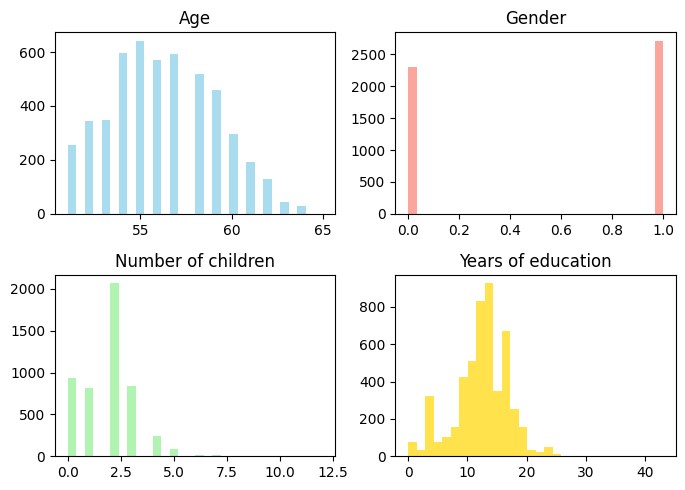


Job Status:
job_status
Private sector employee    0.60
Public sector employee     0.28
Self-employed              0.12
Name: proportion, dtype: float64

Industry of Employment:
industry
Health and social work                          0.14
Other community                                 0.13
Manufacturing                                   0.13
Education                                       0.12
Public administration and defence               0.11
Wholesale and retail trade                      0.10
Transport, storage and communication            0.06
Construction                                    0.06
Financial intermediation                        0.04
Agriculture, hunting, forestry, fishing         0.04
Hotels and restaurants                          0.02
Electricity, gas and water supply               0.02
Real estate, renting and business activities    0.02
Mining and quarrying                            0.01
Other                                           0.01
Name: proportion, 

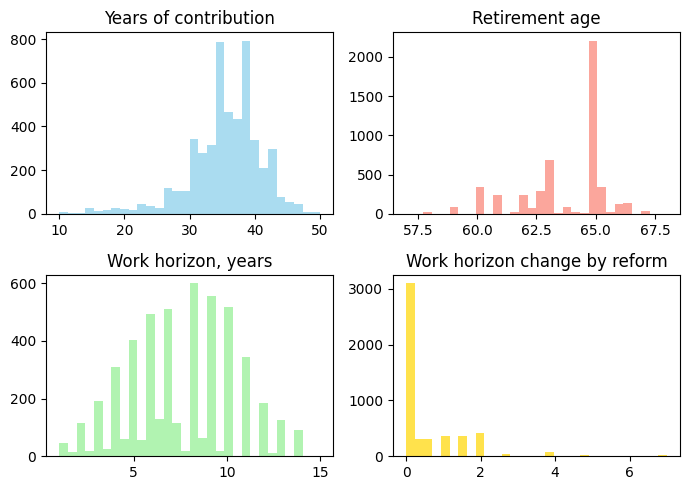


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.39
1       0           0.36
0       1           0.20
1       1           0.05
0       Refusal     0.00
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.8
1    0.2
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     1275
1.0     1183
2.0      921
3.0      652
4.0      440
5.0      273
6.0      145
7.0       76
8.0       26
9.0       15
10.0       8
11.0       2
Name: count, dtype: int64


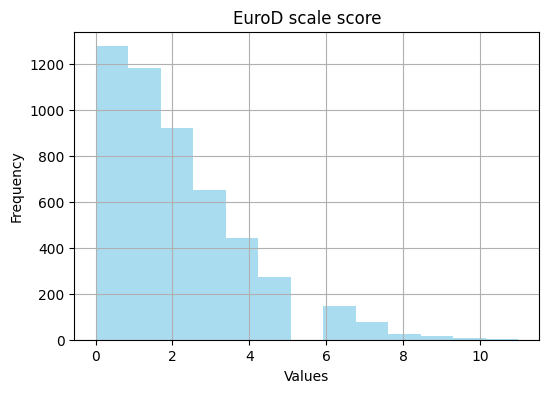


Working Conditions:


KeyError: "None of [Index(['jqi_monthly_earnings_pure', 'jqi_skills_discretion_pure',\n       'jqi_social_environment_pure', 'jqi_physical_environment_pure',\n       'jqi_intensity_pure', 'jqi_prospects_pure',\n       'jqi_working_time_quality_pure', 'jqi_sum_pure'],\n      dtype='object')] are in the [columns]"

In [26]:
describe_data(df)

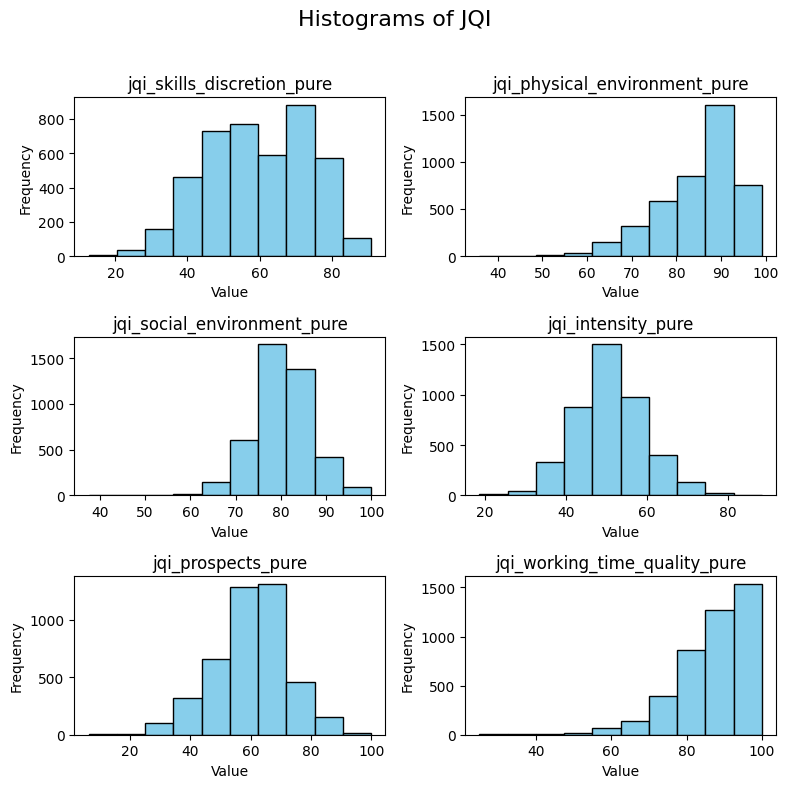

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle("Histograms of JQI", fontsize=16)

axes = axes.flatten()

for i, column in enumerate(
    df[
        [
            "jqi_skills_discretion_pure",
            "jqi_physical_environment_pure",
            "jqi_social_environment_pure",
            "jqi_intensity_pure",
            "jqi_prospects_pure",
            "jqi_working_time_quality_pure",
        ]
    ].columns
):
    axes[i].hist(df[column], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()